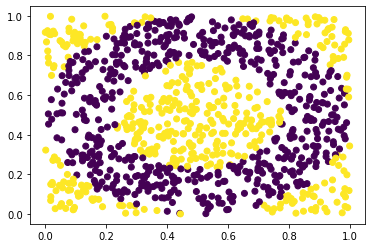

In [320]:
import torch as t
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, Dataset

def make_batch(size):
    radius = 0.5
    X = np.random.random((size, 2)).astype(np.float32)
    Y = np.where((((radius-X[:,0])**2 + (radius - X[:,1])**2 < radius**2) & ((radius-X[:,0])**2 + (radius - X[:,1])**2 > (radius**2)*0.3)), 0, 1).astype(np.float32)
    return t.from_numpy(X), t.from_numpy(Y).unsqueeze(1)

_x, _y = make_batch(1000)
_x = _x.detach().numpy()
_y = _y.detach().numpy()
plt.scatter(x=_x[:, 0], y=_x[:, 1], c=_y)

In [321]:
_x, _y = make_batch(2)
_y[1,:]

tensor([0.])

In [322]:
class XORDataset(Dataset): 
    def __init__(self, size):
        self.size = size
        self.data = make_batch(size)
        self.X = self.data[0]
        self.Y = self.data[1]
        
    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        return self.X[idx, :], self.Y[idx, :]

In [323]:
train = XORDataset(10000)
test = XORDataset(1000)
train[0:2]

(tensor([[0.3958, 0.7745],
         [0.6124, 0.5926]]),
 tensor([[0.],
         [1.]]))

In [324]:
class XORModel(t.nn.Module):
    def __init__(self):
        super().__init__()
        self.stack = t.nn.Sequential(
            t.nn.Linear(2, 4),
            t.nn.Sigmoid(),
            t.nn.Linear(4, 2),
            t.nn.Sigmoid(),
            t.nn.Linear(2, 1),
            t.nn.Sigmoid()
        )
        
    def forward(self, X):
        return self.stack(X)

XORModel(
  (stack): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=2, out_features=4, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=4, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

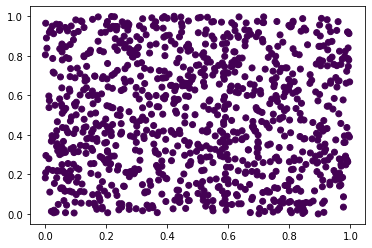

In [325]:
_x, _y = make_batch(1000)
model = XORModel()
_untrained_answer = model(_x).detach().numpy()
_untrained_answer = np.where(_untrained_answer < 0.5, 0, 1)
plt.scatter(x=_x[:, 0].detach().numpy(), y=_x[:, 1].detach().numpy(), c=_untrained_answer)
model

In [326]:
model.train()
loss_function = t.nn.BCELoss()
optimizer = t.optim.Adam(model.parameters(), lr=0.01)
max_epochs = 2
batch_size = 100
_train = DataLoader(XORDataset(10000 * batch_size), batch_size=batch_size, shuffle=True)
for i in range(0, max_epochs):
    for (b_X, b_Y) in _train:
        optimizer.zero_grad()
        b_ans = model.forward(b_X)
        loss = loss_function(b_ans, b_Y)
        loss.backward()
        optimizer.step()
model.eval()

XORModel(
  (stack): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=2, out_features=4, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=4, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

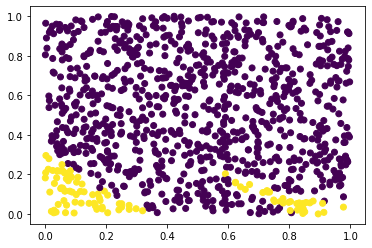

In [327]:
# model.train_model(iterations=10000)
_x_test, _y_test = make_batch(10000)
_trained_answer = model(_x).detach().numpy()
_trained_answer = np.where(_trained_answer < 0.5, 0, 1)
plt.scatter(x=_x[:, 0].detach().numpy(), y=_x[:, 1].detach().numpy(), c=_trained_answer, linewidths=1)